### Code for [Tutorial 2: KNN Classification](https://franciszheng.com/dsper2020/tutorials/tutorial02/#classification)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'type']
df = pd.read_csv(url, names=names)

In [3]:
df.head()

,sepal-length,sepal-width,petal-length,petal-width,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X = df.iloc[:, :-1] #attributes
y = df['type'] #labels

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [8]:
print("predicted: ", y_pred)
print("actual: ", y_test)

predicted:  ['Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']
actual:  124     Iris-virginica
59     Iris-versicolor
142     Iris-virginica
17         Iris-setosa
68     Iris-versicolor
50     Iris-versicolor
90     Iris-versicolor
122     Iris-virginica
67     Iris-versicolor
95     Iris-versicolor
58     Iris-versicolor
52     Iris-versicolor
42         Iris-setosa
70     Iris-versicolor
18         Iris-setosa
74     Iris-versicolor
81     Iris-versicolor
135     Iris-virginica
10         Iris-setosa
107     Iris-virginica
64

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         6
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.98      0.97        30
   weighted avg       0.97      0.97      0.97        30



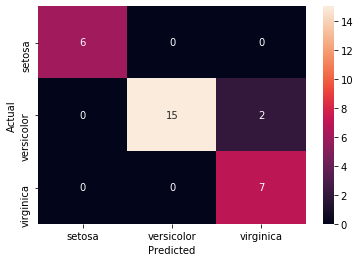

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = SVC(kernel = 'linear').fit(X_train, y_train)
clf.predict(X_train)
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()